# Optimal Portfolio Calculator

* **Author**: Alejandro Leiva

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## Extracting Data from YF

In [20]:
tickers_input = input("Enter Yahoo Finance tickers separated by spaces: ") # e.g.: AAPL, MSFT, XOM, BSX, BAC, SPY
tickers = tickers_input.split()

today = datetime.date.today()
today_str = today.strftime("%Y-%m-%d")

start_date = "1990-01-01"
end_date = today_str

# Create an empty DataFrame to store the historical data
historical_data = pd.DataFrame()

# Loop through each ticker and fetch historical data
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Ticker'] = ticker  
    historical_data = pd.concat([historical_data, stock_data])

Enter Yahoo Finance tickers separated by spaces: AAPL MSFT XOM BSX BAC SPY
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### 1.2 Cleaning Data: prices, vols & returns

#### Price

Ticker         AAPL          BAC          BSX         MSFT          SPY  \
count   8618.000000  8618.000000  8016.000000  8618.000000  7839.000000   
mean      25.384975    17.750028    19.622399    54.783918   143.995662   
std       46.935754    10.315572    13.777354    85.715588   115.367018   
min        0.097793     1.684609     2.406250     0.370110    24.464321   
25%        0.315119     9.580342     8.850000    13.589853    70.558121   
50%        2.609341    15.162963    14.500000    20.371728    93.516373   
75%       24.962858    25.894459    28.832500    41.515422   182.034706   
max      197.857529    46.471870    67.820000   425.220001   515.179321   

Ticker          XOM  
count   8618.000000  
mean      36.398187  
std       25.547536  
min        3.610561  
25%       15.890858  
50%       35.164320  
75%       55.732779  
max      118.014030  
Axes(0.125,0.2;0.775x0.68)


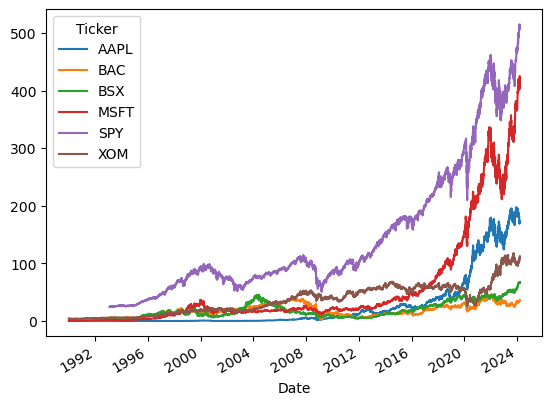

In [21]:
price_df = historical_data.pivot_table(index='Date', columns='Ticker', values='Adj Close')

print(price_df.describe())
print(price_df.plot())

In [85]:
price_df.isna().sum()

Ticker
AAPL      0
BAC       0
BSX     602
MSFT      0
SPY     779
XOM       0
dtype: int64

#### Volume

Ticker          AAPL           BAC           BSX          MSFT           SPY  \
count   8.618000e+03  8.618000e+03  8.016000e+03  8.618000e+03  7.839000e+03   
mean    3.625126e+08  5.767783e+07  8.220185e+06  5.559626e+07  8.441727e+07   
std     3.594220e+08  8.931665e+07  8.534440e+06  3.360100e+07  9.203790e+07   
min     2.396800e+06  1.156000e+05  1.160000e+04  3.705600e+06  5.200000e+03   
25%     1.304806e+08  6.241900e+06  3.185375e+06  3.245530e+07  1.019275e+07   
50%     2.440592e+08  1.987815e+07  6.282600e+06  4.965500e+07  6.342640e+07   
75%     4.579736e+08  7.339660e+07  1.073335e+07  6.922260e+07  1.152194e+08   
max     7.421641e+09  1.226791e+09  2.438740e+08  7.645040e+08  8.710263e+08   

Ticker           XOM  
count   8.618000e+03  
mean    1.431633e+07  
std     1.023784e+07  
min     3.828000e+05  
25%     7.159850e+06  
50%     1.180830e+07  
75%     1.879842e+07  
max     1.180235e+08  
Axes(0.125,0.2;0.775x0.68)


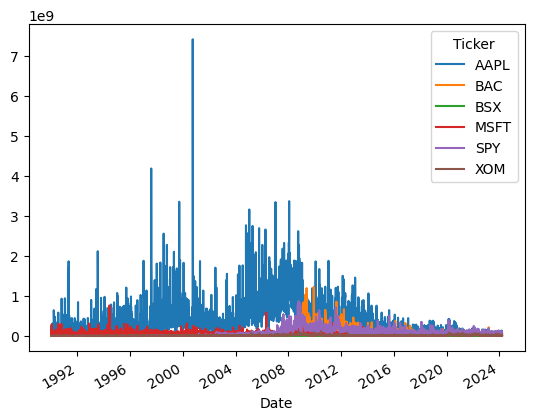

In [22]:
volume_df = historical_data.pivot_table(index='Date', columns='Ticker', values='Volume')

print(volume_df.describe())
print(volume_df.plot())

#### Returns

$\text{R}_{t} = \frac{P_t}{P_{t-1}}$

Ticker         AAPL          BAC          BSX         MSFT          SPY  \
count   8617.000000  8617.000000  8015.000000  8617.000000  7838.000000   
mean       0.112458     0.057328     0.063765     0.101112     0.045640   
std        2.697215     2.581615     2.417460     1.995835     1.179878   
min      -51.869204   -28.969327   -26.699029   -15.597766   -10.942366   
25%       -1.178903    -0.983139    -1.096345    -0.893714    -0.444030   
50%        0.039083     0.000000     0.000000     0.037948     0.067334   
75%        1.390334     1.063741     1.173888     1.074190     0.595547   
max       33.228102    35.269208    26.128596    19.565168    14.519697   

Ticker          XOM  
count   8617.000000  
mean       0.051163  
std        1.572270  
min      -13.952544  
25%       -0.763524  
50%        0.011768  
75%        0.862041  
max       17.190513  
Axes(0.125,0.2;0.775x0.68)


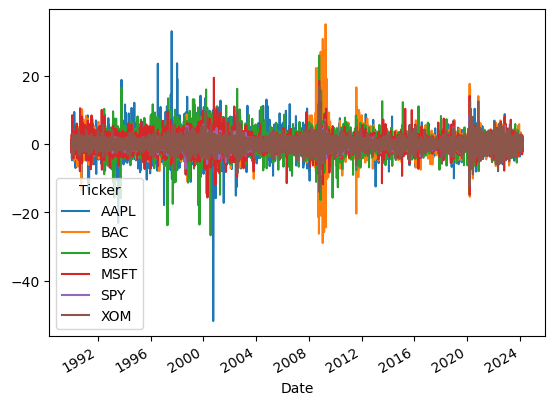

In [88]:
#returns_df = (np.log(price_df) - np.log(price_df.shift(1)))*100 #Log diff
returns_df = price_df.pct_change(periods=1, fill_method=None)*100 # Pct change


print(returns_df.describe())
print(returns_df.plot())

## Descriptive Metrics

### Return Measures

1. Cumulative Return:

    $ CR_t = (1 + DR_1) \times (1 + DR_2) \times \ldots \times (1 + DR_t) $
  
- Where  $CR_t$  is the cumulative return at time $ t $ and $ DR_i $ is the daily return on day $i$
- **Description:** Cumulative return represents the return of holding the asset from the first date to the last available date using daily returns.
 

---
2. **Portfolio Return (PR)**:
  
  
      $ PR = \frac{\sum_{i=1}^{n} (w_i \times R_i)}{n}$
   - Description: Portfolio return is the average return earned by the portfolio over a specific time period.
   - Interpretation: A higher portfolio return indicates better performance, while a lower return may suggest underperformance.
   
---

2. **Annualized Return (AR)**:
    - **With Daily Data**:
    
       $AR_{\text{daily}} = \left(1 + \frac{\text{Daily Return}}{100}\right)^{252} - 1 $
       - Use 252 instead of 365 because of trading days.
       
    - **With Monthly Data**:
        
        $AR_{\text{monthly}} = \left(1 + \frac{\text{Monthly Return}}{100}\right)^{12} - 1$


   - Description: Annualized return expresses the portfolio's return on an annual basis, regardless of the actual time period.
   - Interpretation: It helps investors compare the portfolio's performance with other investments on an annualized basis.

1. Cum Returns

In [221]:
def cum_returns(daily_returns_df, tickers, start_date, end_date):
    
    """
    Calculate cumulative buy and hold performance given daily returns DataFrame, tickers, and start/end dates.
    
    Parameters:
        daily_returns_df (df): df containing daily returns with dates as index and tickers in columns.
        tickers (list): List of ticker symbols.
        start_date (string or datetime): first period
        end_date (string or datetime): last date
    Returns:
        fig: cum return line plot.
        numbers: last observations with total buy and hold performance in period
        cumulative returns: df with cum returns
    """
    
    
    # Pass to %
    returns_data = daily_returns_df.loc[start_date:end_date] / 100

    # New df to store results
    cumulative_returns = pd.DataFrame(index=returns_data.index)

    # Calculate cum returns to each col
    for ticker in tickers:
        cumulative_returns[ticker] = ((1 + returns_data[ticker]).cumprod()-1)*100

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for ticker in cumulative_returns.columns:
        ax.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)

    # Plot features
    ax.set_title(f'Buy and Hold Returns from {start_date} to {end_date}')
    ax.set_ylabel('Cumulative Returns in %')
    ax.legend(loc='upper left')
    ax.grid(True)
    fig.tight_layout()
    # plt.show(False)
    
    return fig, cumulative_returns.loc[cumulative_returns.last_valid_index()], cumulative_returns

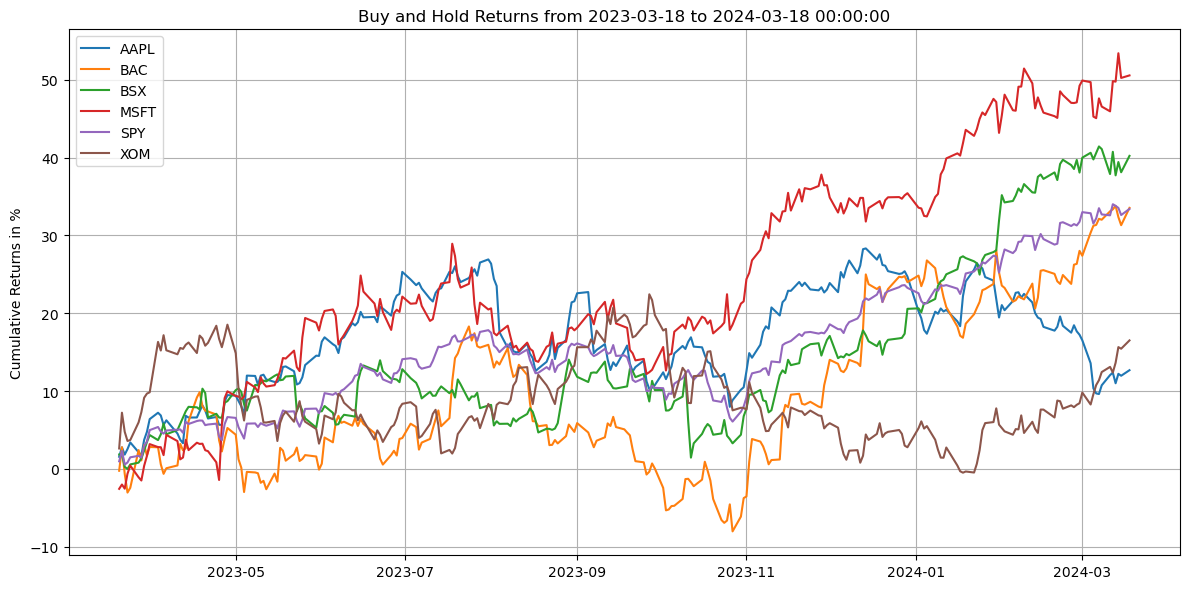

In [229]:
figura, numeros, cum_returns_df = cum_returns(returns_df, returns_df.columns, "2023-03-18", returns_df.last_valid_index())

2. Portfolio Returns

In [217]:
def calculate_portfolio_return(returns_df, tickers, weights=None):
   
    """
    Calculate the portfolio return given daily returns DataFrame, tickers, and optional weights.
    
    Parameters:
        returns_df (DataFrame): DataFrame containing daily returns with dates as index and tickers in columns.
        tickers (list): List of ticker symbols.
        weights (list, optional): List of weights for each ticker. Defaults to None (equally weighted portfolio).
    
    Returns:
        float: Portfolio return.
    """
    
    # Check if weights are provided, if not, use equally weighted portfolio
    if weights is None:
        weights = [1/len(tickers)] * len(tickers)
    
    # Ensure weights sum up to 1
    weights_sum = sum(weights)
    if weights_sum != 1:
        weights = [w/weights_sum for w in weights]
    
    # Calculate portfolio return
    portfolio_return = (returns_df[tickers] * weights).sum(axis=1)
    portfolio_return = portfolio_return.to_frame()
    portfolio_return.rename(columns={0: "Portfolio"}, inplace=True)
    
    return portfolio_return, weights


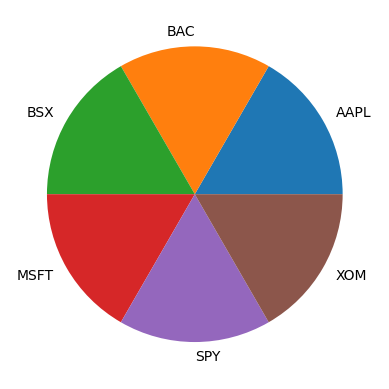

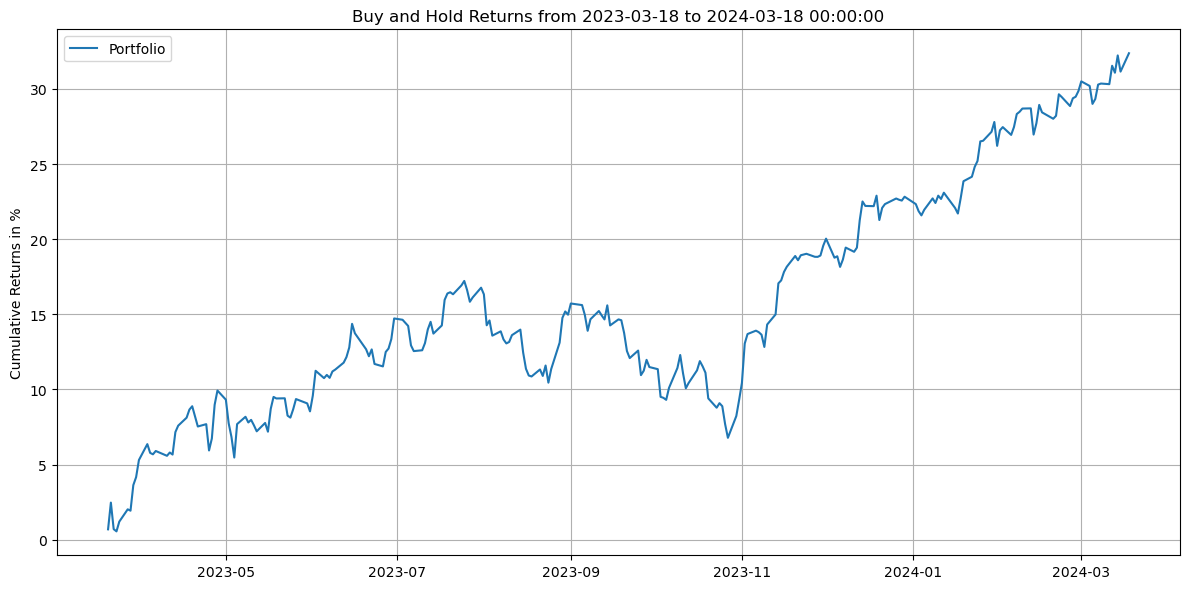

In [237]:
port_returns, pesos = calculate_portfolio_return(returns_df, returns_df.columns)

#weights=[0.1,0.1,0.1,0.1,0.1,0.5]

# Pesos
gg = np.array(pesos)
plt.pie(gg, labels=returns_df.columns)

# Buy and Hold Portfolio returns
cum_returns_port_df = cum_returns(port_returns, port_returns.columns, "2023-03-18", port_returns.last_valid_index())[2]

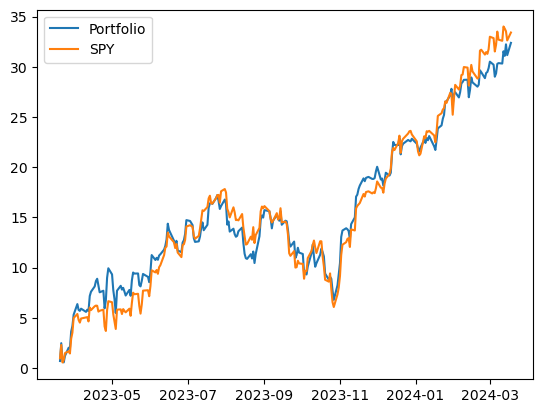

In [238]:
plt.plot(cum_returns_port_df, label='Portfolio')
plt.plot(cum_returns_df['SPY'], label='SPY')
plt.legend()

### Risk Measures

1. **Portfolio Standard Deviation (SD)**:

    $SD = \sqrt{\sum_{i=1}^{n} \left( w_i^2 \times \sigma_i^2 \right) + 2 \times \sum_{i=1}^{n-1} \sum_{j=i+1}^{n} \left( w_i \times w_j \times \sigma_i \times \sigma_j \times \rho_{ij} \right)}$ 
   - Description: Portfolio standard deviation measures the volatility or risk of the portfolio's returns.
   - Interpretation: A higher standard deviation indicates higher volatility and risk, while a lower standard deviation implies lower risk.

---
2. **Beta ($\beta$ )**:

     $ \beta = \frac{\text{Cov}(R_{\text{portfolio}}, R_{\text{market}})}{\text{Var}(R_{\text{market}})} $
   - Description: Beta measures the sensitivity of the portfolio's returns to changes in the market returns.
   - Interpretation: A beta greater than 1 indicates the portfolio is more volatile than the market, while a beta less than 1 suggests lower volatility compared to the market.

---

3. **Value at Risk (VaR)**:
   - Description: VaR estimates the maximum potential loss the portfolio could suffer over a specified time period at a given confidence level.
   - Interpretation: For example, a VaR of 5% at a 95% confidence level implies that there is a 5% chance of the portfolio losing more than the VaR amount over the specified period.



### Risk-Adjusted Measures:

1. **Sharpe Ratio**:
   - Description: Sharpe ratio measures the risk-adjusted return of the portfolio by comparing the excess return to the volatility of the portfolio's returns.
   - Interpretation: A higher Sharpe ratio indicates better risk-adjusted returns. It helps investors assess if the return generated by the portfolio is worth the risk taken.
   - Formula: $ SharpeRatio = \frac{PR - R_f}{SD} $

2. **Treynor Ratio**:
   - Description: Treynor ratio measures the risk-adjusted return of the portfolio relative to the systematic risk (beta).
   - Interpretation: A higher Treynor ratio indicates better risk-adjusted returns per unit of systematic risk. It helps investors evaluate how efficiently the portfolio is utilizing systematic risk to generate returns.
   - Formula: $ TreynorRatio = \frac{PR - R_f}{\beta} $

3. **Information Ratio**:

    - $ \text{InformationRatio} = \frac{PR - BM}{ActiveSD} $
   - Description: Information ratio measures the excess return of the portfolio relative to a benchmark, adjusted for the tracking error.
   - Interpretation: A higher information ratio indicates better risk-adjusted performance relative to the benchmark. It helps investors assess the portfolio manager's ability to outperform the benchmark after accounting for risk.



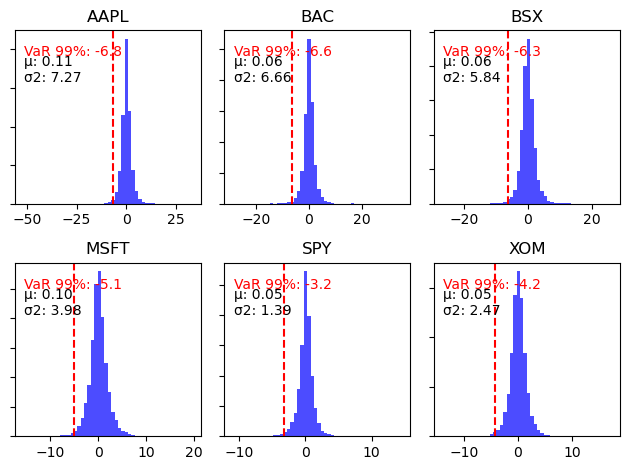

In [242]:
# Create a 4x5 grid of subplots
fig, axes = plt.subplots(2,3)
fig.subplots_adjust(hspace=0.8)
axes = axes.ravel()

# Loop through each stock
for i, column in enumerate(returns_df.columns):
    ax = axes[i]

    # Get the returns for the current stock
    stock_returns = returns_df[column].dropna()

    # Plot a histogram of returns
    ax.hist(stock_returns, bins=50, alpha=0.7, color='blue', density=True)
    
    
    # Add VaR line and annotation
    var_99 = np.percentile(stock_returns, 1)
    ax.axvline(var_99, color='red', linestyle='--', label=f'VaR 99%: {var_99:.1f}')
    ax.annotate(f'VaR 99%: {var_99:.1f}', xy=(0.05, 0.85), xycoords='axes fraction', color='red')

    # Add mean return and variance annotations
    mean_return = stock_returns.mean()
    variance = stock_returns.var()
    ax.annotate(f'μ: {mean_return:.2f}\nσ2: {variance:.2f}', xy=(0.05, 0.70), xycoords='axes fraction')

    # Set title for the subplot
    ax.set_title(f'{column}')

    # Remove y-axis labels to save space
    ax.set_yticklabels([])

# Display the plot
plt.tight_layout()
plt.show()


In [241]:
# Calculate the specified indicators for each stock
max_drawdown = returns_df.min()
median_return = returns_df.median()
mean_return = returns_df.mean()
std_deviation = returns_df.std()
variance = std_deviation ** 2

# Assume a risk-free rate of 4.5% for the Sharpe and Sortino ratios (adjust as needed)
risk_free_rate = 0.045/252
excess_returns = returns_df - risk_free_rate
sharpe_ratio = (mean_return - risk_free_rate) / std_deviation
downside_returns = np.where(excess_returns < 0, excess_returns, 0)
sortino_ratio = (mean_return - risk_free_rate) / np.std(downside_returns)

# Calculate Mean Absolute Deviation (MAD)
# mad = returns_2023.mad()
mad = np.abs(returns_df - returns_df.mean()).mean()


# Calculate Kurtosis
kurt = returns_df.kurtosis()

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Max Drawdown': max_drawdown,
    'Median': median_return,
    'Mean': mean_return,
    'Sharpe': sharpe_ratio,
    'Sortino': sortino_ratio,
    'MAD': mad,
    'Kurtosis': kurt,
    'Std': std_deviation,
    'Variance': variance
})

# Display the results table
print(results_df.T)

Ticker             AAPL        BAC        BSX       MSFT        SPY        XOM
Max Drawdown -51.869204 -28.969327 -26.699029 -15.597766 -10.942366 -13.952544
Median         0.039083   0.000000   0.000000   0.037948   0.067334   0.011768
Mean           0.112458   0.057328   0.063765   0.101112   0.045640   0.051163
Sharpe         0.041628   0.022137   0.026303   0.050572   0.038530   0.032427
Sortino        0.086642   0.044100   0.049067   0.077887   0.035081   0.039343
MAD            1.829992   1.569193   1.629394   1.397221   0.784811   1.106018
Kurtosis      23.951450  26.673443  11.250099   6.301645  11.366598   8.471432
Std            2.697215   2.581615   2.417460   1.995835   1.179878   1.572270
Variance       7.274970   6.664735   5.844112   3.983357   1.392113   2.472033


Ticker      AAPL       BAC       BSX      MSFT       SPY       XOM
Ticker                                                            
AAPL    1.000000  0.262324  0.210622  0.408749  0.482325  0.209117
BAC     0.262324  1.000000  0.287278  0.337098  0.642678  0.372441
BSX     0.210622  0.287278  1.000000  0.279790  0.447382  0.262104
MSFT    0.408749  0.337098  0.279790  1.000000  0.664736  0.310367
SPY     0.482325  0.642678  0.447382  0.664736  1.000000  0.594020
XOM     0.209117  0.372441  0.262104  0.310367  0.594020  1.000000


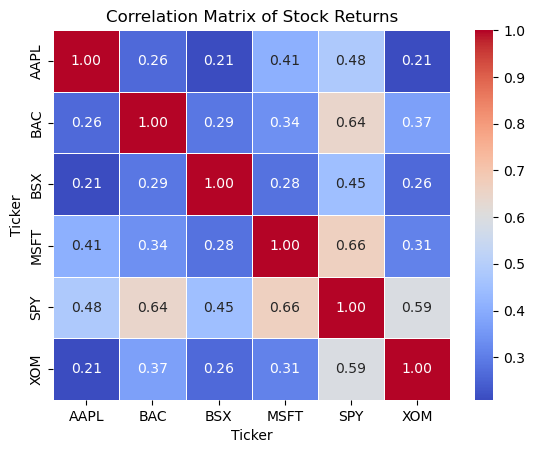

In [239]:

# Calculate the correlation matrix for the returns of the stocks
correlation_matrix = returns_df.corr()

# Display the resulting correlation matrix
print(correlation_matrix)

# Set the size of the plot
plt.figure()

# Create a heatmap of the correlation matrix with colors
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Set the title of the heatmap
plt.title("Correlation Matrix of Stock Returns")

# Show the plot
plt.show()

